# unit 3 / lesson 1 / project 1 
## KNN classifier

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from matplotlib import style
from collections import Counter
style.use('fivethirtyeight')

import scipy
%matplotlib inline

## nearest neighbor

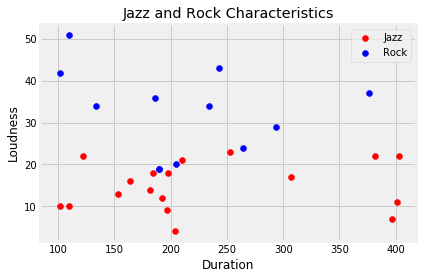

In [2]:
music = pd.DataFrame()

# Some data to play with.
music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]

# We know whether the songs in our training data are jazz or not.
music['jazz'] = [ 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
                  0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
                  1, 1, 1, 1, 0, 0, 1, 1, 0, 0]


# Look at our data.
plt.scatter(
    music[music['jazz'] == 1].duration,
    music[music['jazz'] == 1].loudness,
    color='red'
)
plt.scatter(
    music[music['jazz'] == 0].duration,
    music[music['jazz'] == 0].loudness,
    color='blue'
)
plt.legend(['Jazz', 'Rock'])
plt.title('Jazz and Rock Characteristics')
plt.xlabel('Duration')
plt.ylabel('Loudness')
plt.show()

In [3]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = KNeighborsClassifier(n_neighbors=1)
X = music[['loudness', 'duration']]
Y = music.jazz
neighbors.fit(X,Y)

## Predict for a song with 24 loudness that's 190 seconds long.
neighbors.predict([[24, 190]])

array([0])

In [4]:
neighbors.predict([[10, 100]])

array([1])

### Challenge: Implement the Nearest Neighbor algorithm

In [5]:
def nearest_neighbors(data, predict):
    distance_min = -1
    closest = -1
    euclidean_distance = 0
    for index, row in data.iterrows():
        euclidean_distance = np.sqrt( (row[0]-predict[0])**2 + (row[1]-predict[1])**2 )
        if (euclidean_distance < distance_min) or (index ==0):
            distance_min = euclidean_distance
            jazz = row[2]
    return jazz

In [6]:
predict = [190, 24]
nearest_neighbors(music, predict)

0

In [7]:
predict = [100, 10]
nearest_neighbors(music, predict)

1